In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   # For egnoring the warnings
warnings.filterwarnings('ignore')

In [2]:
df_tracks = pd.read_csv('tracks.csv')
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [25]:
df_tracks.shape

(586672, 20)

In [26]:
# Checking Null Values
pd.isnull(df_tracks).sum()

id                   0
name                71
popularity           0
explicit             0
artists              0
id_artists           0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
duration             0
dates                0
dtype: int64

In [27]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 586672 entries, 1922-02-22 to 2015-07-01
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586672 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586672 non-null  int64         
 3   explicit          586672 non-null  int64         
 4   artists           586672 non-null  object        
 5   id_artists        586672 non-null  object        
 6   danceability      586672 non-null  float64       
 7   energy            586672 non-null  float64       
 8   key               586672 non-null  int64         
 9   loudness          586672 non-null  float64       
 10  mode              586672 non-null  int64         
 11  speechiness       586672 non-null  float64       
 12  acousticness      586672 non-null  float64       
 13  instrumentalness  586672 non-null  float64 

In [28]:
# Top 10 least popular songs
sorted_df = df_tracks.sort_values('popularity', ascending =True ).head(10)
sorted_df

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,dates
release_date,,,,,,,,,,,,,,,,,,,,
1935-02-20,181rTRhCcggZPwP2TUcVqm,"Newspaper Reports On Abner, 20 February 1935",0,0,"['Norris Goff', 'Chester Lauck', 'Carlton Bric...","['3WCwCPDMpGzrt0Qz6quumy', '7vk8UqABg0Sga78GI3...",0.595,0.262,8,-17.746,1,0.9320,0.993,0.007510,0.0991,0.320,79.849,4,897,1935-02-20
1949-01-01,0yOCz3V5KMm8l1T8EFc60i,恋は水の上で,0,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],0.418,0.388,0,-8.580,1,0.0358,0.925,0.000014,0.1050,0.439,94.549,4,188,1949-01-01
1949-01-01,0y48Hhwe52099UqYjegRCO,私の誕生日,0,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],0.642,0.178,5,-11.700,1,0.0501,0.993,0.000943,0.0928,0.715,119.013,4,173,1949-01-01
1949-01-01,0xCmgtf9ka07hkZg3D6PaV,エル・チョクロ (EL CHOCLO),0,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],0.695,0.467,0,-12.236,0,0.0422,0.827,0.000000,0.0861,0.756,125.941,4,205,1949-01-01
1949-01-01,0tBXS3VuCPX7KWUFH2nros,恋は不思議なもの,0,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],0.389,0.388,2,-8.221,1,0.0351,0.869,0.000000,0.0924,0.372,72.800,4,186,1949-01-01
1949-01-01,0qrKnQtYDVJhKFAXTHYVS9,ゆうべはどうしたの (WHATSA MALLA U),0,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],0.631,0.249,5,-11.883,1,0.0355,0.951,0.000000,0.0814,0.517,131.097,4,183,1949-01-01
1949-04-10,0nqsDxOeKSwEzp3AUQAAqS,"Screen Director's Playhouse, Music For Million...",0,0,"['Wilms Herbert', 'June Allyson', 'Joseph Kear...","['2rbm8QWvmnVwxFo84EVM1h', '4yW5adMgyIfHFzaL9i...",0.533,0.317,7,-13.047,1,0.9180,0.682,0.000000,0.3330,0.336,76.836,4,1767,1949-04-10
1949-01-01,0kGEdsxVLYjCdfxM9tbezd,ブルーマンボ,0,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],0.529,0.546,0,-6.462,0,0.0418,0.784,0.000000,0.3750,0.903,128.604,4,162,1949-01-01
1949-05-19,0bc3PUZurUUXrY7yqoOxjq,"Screen Director's Playhouse, Trade Winds direc...",0,0,"['Wally Maher', 'Tay Garnett', 'Lurene Tuttle'...","['7hkhJTTI3VnUGVWUt8SJXT', '3kYeeIpRCgJz4fQYDv...",0.599,0.321,0,-15.428,0,0.9330,0.808,0.000000,0.5570,0.379,93.025,4,1777,1949-05-19


In [29]:
df_tracks.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
popularity,586672.0,27.570053,0.0,13.0,27.0,41.0,100.0,18.370642
explicit,586672.0,0.044086,0.0,0.0,0.0,0.0,1.0,0.205286
danceability,586672.0,0.563594,0.0,0.453,0.577,0.686,0.991,0.166103
energy,586672.0,0.542036,0.0,0.343,0.549,0.748,1.0,0.251923
key,586672.0,5.221603,0.0,2.0,5.0,8.0,11.0,3.519423
loudness,586672.0,-10.206067,-60.0,-12.891,-9.243,-6.482,5.376,5.089328
mode,586672.0,0.658797,0.0,0.0,1.0,1.0,1.0,0.474114
speechiness,586672.0,0.104864,0.0,0.034,0.0443,0.0763,0.971,0.179893
acousticness,586672.0,0.449863,0.0,0.0969,0.422,0.785,0.996,0.348837
instrumentalness,586672.0,0.113451,0.0,0.0,0.000024,0.00955,1.0,0.266868


In [30]:
most_popular = df_tracks.query('popularity > 90 ', inplace = False).sort_values('popularity',ascending = False)
most_popular[:10]

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,dates
release_date,,,,,,,,,,,,,,,,,,,,
2021-03-19,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4,198,2021-03-19
2021-01-08,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4,242,2021-01-08
2021-01-06,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4,133,2021-01-06
2020-03-20,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4,216,2020-03-20
2020-12-04,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4,160,2020-12-04
2020-03-20,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,200,2020-03-20
2021-03-05,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4,242,2021-03-05
2020-09-16,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4,164,2020-09-16
2019-11-07,60ynsPSSKe6O3sfwRnIBRf,Streets,94,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4,227,2019-11-07


In [31]:
##################################################
#One more way of doing that
x = df_tracks.popularity > 90
df_tracks[x].sort_values('popularity', ascending=False).head(5)

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,dates
release_date,,,,,,,,,,,,,,,,,,,,
2021-03-19,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4,198,2021-03-19
2021-01-08,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4,242,2021-01-08
2021-01-06,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4,133,2021-01-06
2020-03-20,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4,216,2020-03-20
2020-12-04,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4,160,2020-12-04


In [32]:
"""df_tracks['release_date'] = pd.to_datetime(df_tracks['release_date'], format = 'mixed')
df_tracks.set_index(df_tracks['release_date'],inplace = True)
df_tracks.head()"""
df_tracks.set_index('release_date',inplace = True)
df_tracks.index = pd.to_datetime(df_tracks.index, format = 'mixed')
df_tracks.head()

KeyError: "None of ['release_date'] are in the columns"

In [ ]:
df_tracks[['artists']].iloc[18]

artists    ['Victor Boucher']
Name: 1922-01-01 00:00:00, dtype: object

In [ ]:
df_tracks['duration'] = df_tracks['duration_ms'].apply(lambda x : round(x/1000))
df_tracks.drop('duration_ms',inplace=True ,  axis=1)

In [ ]:
df_tracks.duration.head()

release_date
1922-02-22    127
1922-06-01     98
1922-03-21    182
1922-03-21    177
1922-01-01    163
Name: duration, dtype: int64

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'speechiness'),
 Text(5.5, 0, 'acousticness'),
 Text(6.5, 0, 'instrumentalness'),
 Text(7.5, 0, 'liveness'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'time_signature'),
 Text(11.5, 0, 'duration')]

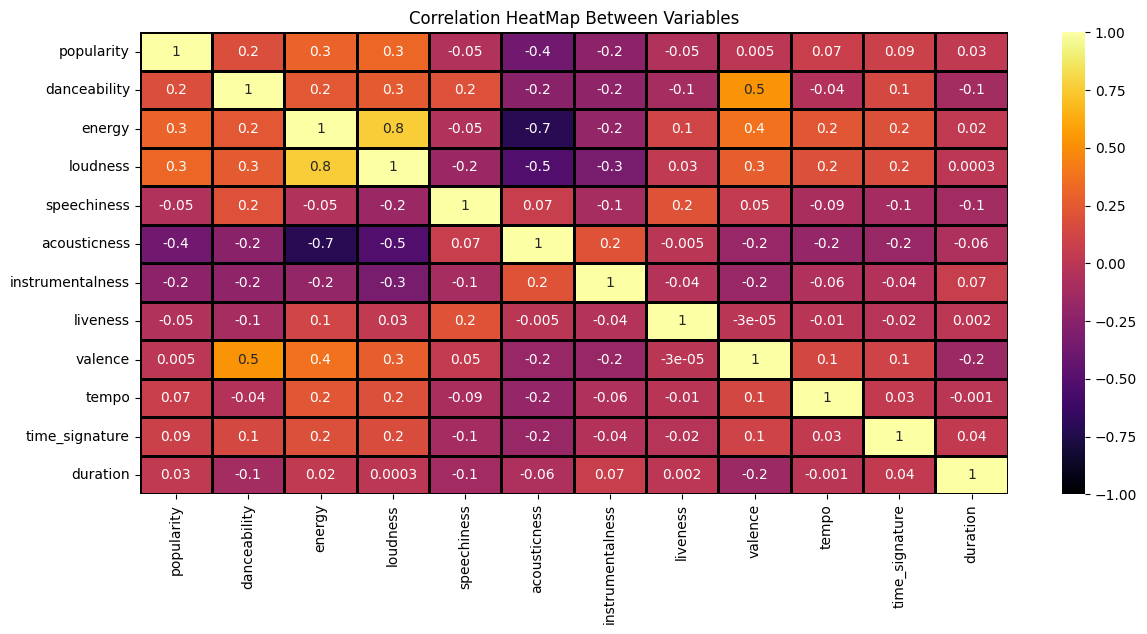

In [ ]:
corr_df = df_tracks.drop(['key','mode','explicit','id', 'name','explicit', 'artists', 'id_artists'],axis = 1).corr(method = "pearson")
plt.figure(figsize = (14,6))
heatmap = sns.heatmap(corr_df , annot =True , fmt = '.1g',vmin = -1,vmax=1,center = 0 ,cmap = 'inferno',linewidths = 1 , linecolor = 'Black')
heatmap.set_title('Correlation HeatMap Between Variables')
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation =90)

In [ ]:
#Taking out a sample from the main data

sample_df = df_tracks.sample(int(0.004*len(df_tracks)))
print(len(sample_df))

2346


[Text(0.5, 1.0, 'Loudness Vs Energy')]

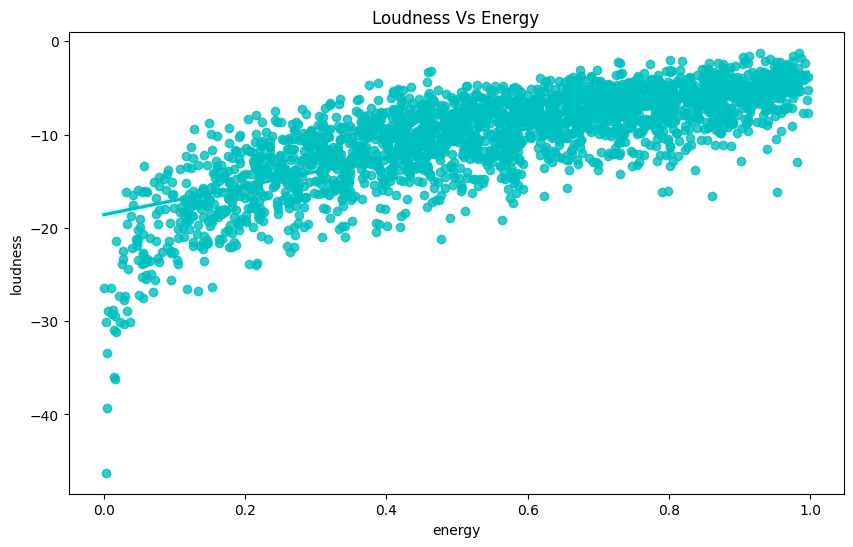

In [ ]:
#Plotting a Regression plot between Loudness and Energy

plt.figure(figsize = (10,6))
sns.regplot(data = sample_df, y = 'loudness',x = 'energy',color = 'c').set(title = 'Loudness Vs Energy')

[Text(0.5, 1.0, 'Popularity Vs Acousticness')]

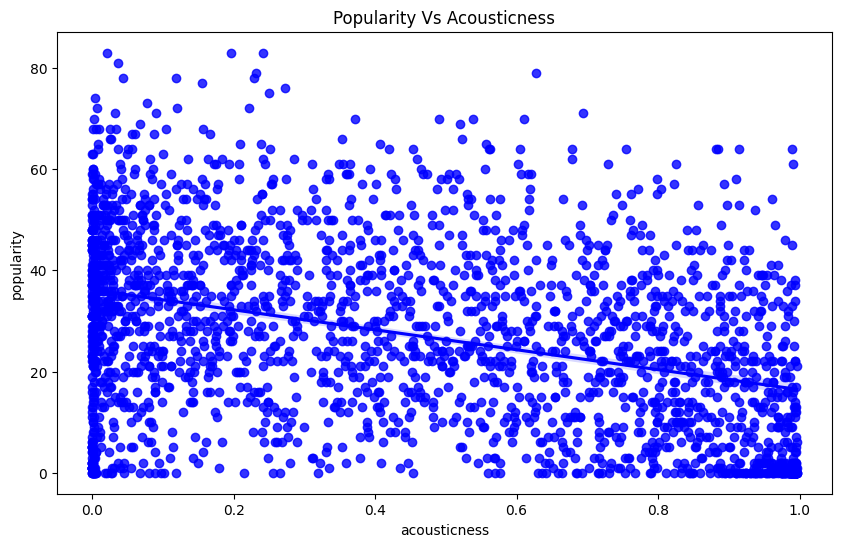

In [ ]:
#Plotting a Regression plot between Popularity and Acousticness

plt.figure(figsize = (10,6))
sns.regplot(data = sample_df, y = 'popularity',x = 'acousticness',color = 'b').set(title = 'Popularity Vs Acousticness')

It shows the downward trend. So it suggests the negative correlation

In [ ]:
df_tracks['dates'] = df_tracks.index.get_level_values('release_date')
df_tracks.dates =pd.to_datetime(df_tracks.dates)
years = df_tracks.dates.dt.year

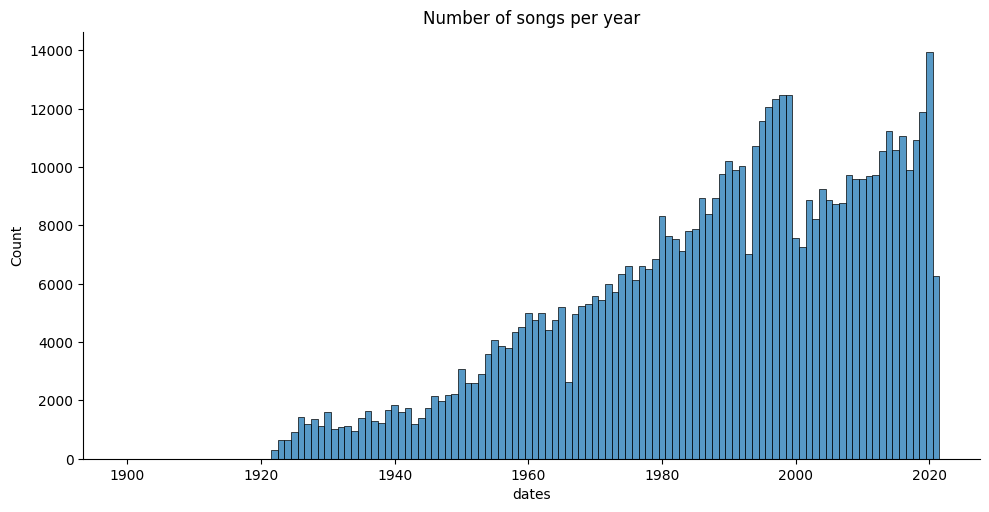

In [ ]:
sns.displot(years , discrete = True , aspect =2,height = 5, kind = 'hist').set(title = 'Number of songs per year')

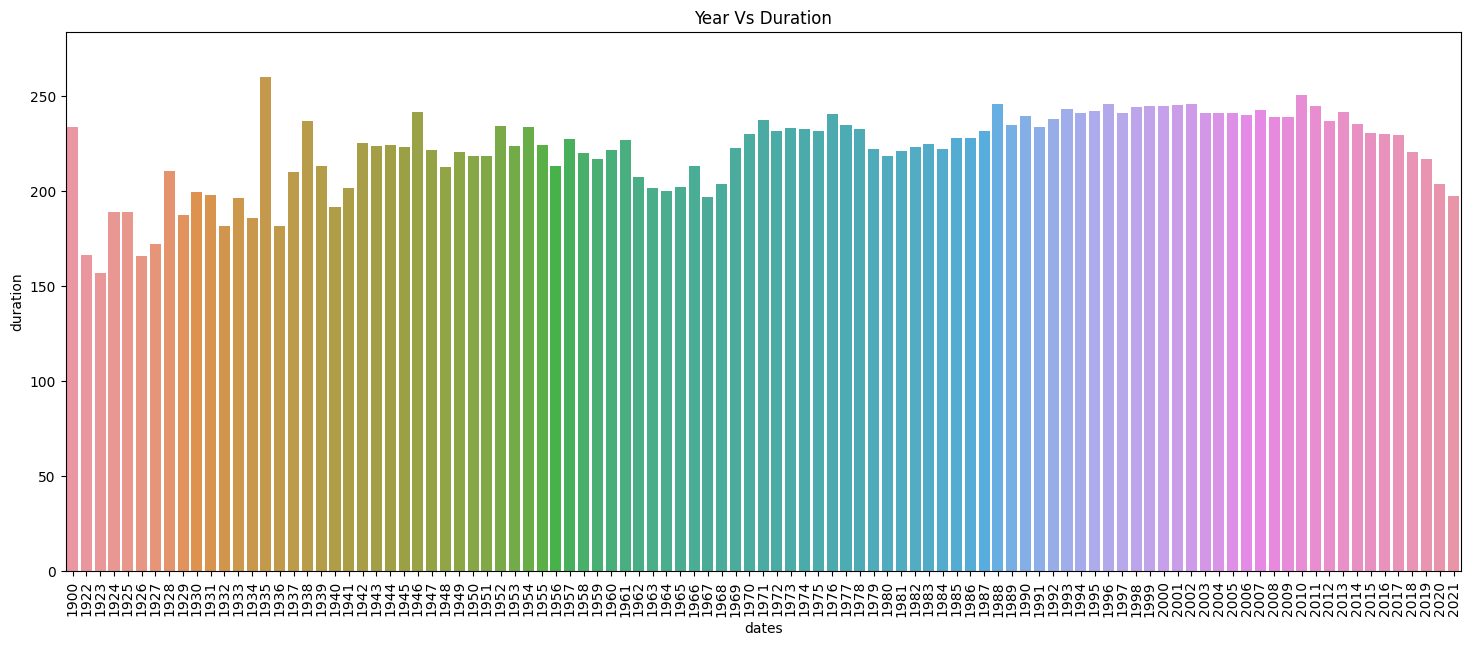

In [ ]:
total_dr = df_tracks.duration
fig_dims = (18,7)
fig , ax = plt.subplots(figsize = fig_dims)
fig = sns.barplot(x= years, y = total_dr,ax = ax, errwidth = False).set(title = 'Year Vs Duration')
plt.xticks(rotation =90)
plt.show()

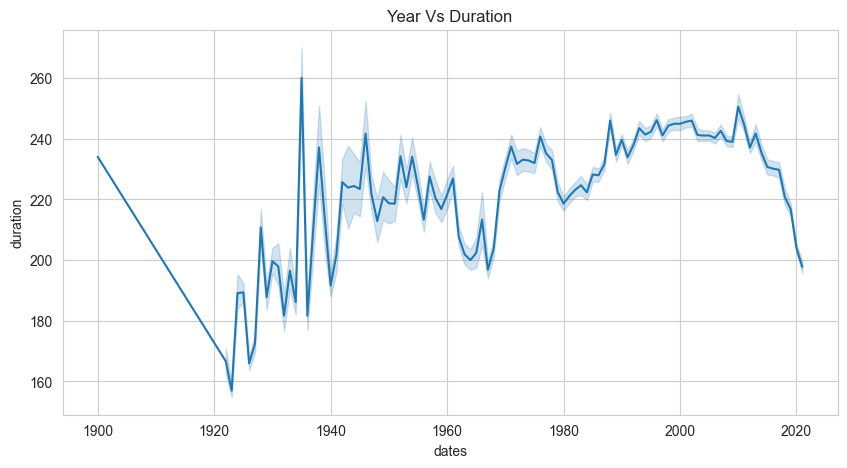

In [ ]:
total_dr =df_tracks.duration
sns.set_style(style = 'whitegrid')
fig ,ax = plt.subplots(figsize =(10,5))
fig = sns.lineplot(x = years,y=total_dr, ax =ax).set(title = 'Year Vs Duration')

In [ ]:
df_genre = pd.read_csv('SpotifyFeatures.csv')

In [ ]:
df_genre.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Text(0, 0.5, 'Genres')

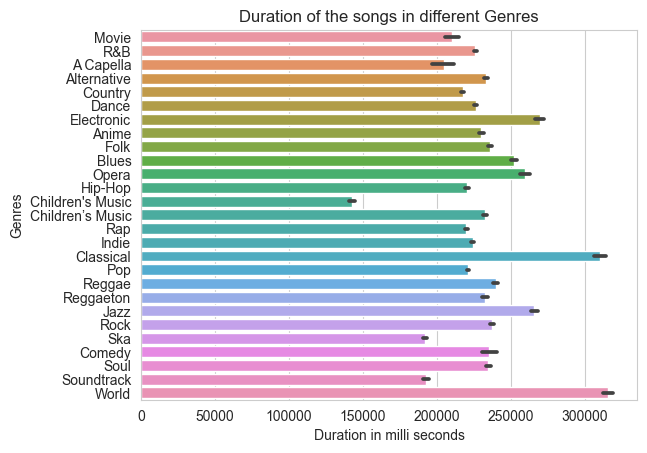

In [ ]:
plt.title('Duration of the songs in different Genres')
sns.color_palette('rocket', as_cmap = True)
sns.barplot(y= 'genre', x = 'duration_ms',data = df_genre)
plt.xlabel('Duration in milli seconds')
plt.ylabel('Genres')

[Text(0.5, 1.0, 'Top 5 Genres by Popularity')]

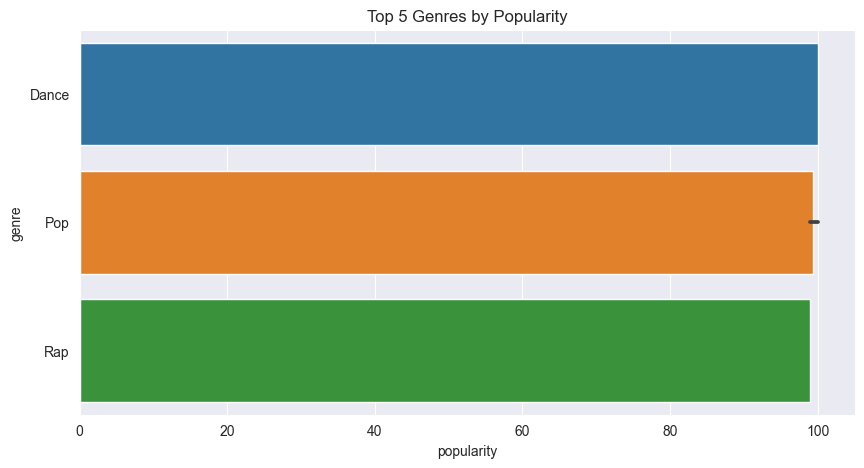

In [ ]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize = (10,5))
famous = df_genre.sort_values('popularity', ascending=False).head()
sns.barplot(y = 'genre',x = 'popularity', data = famous).set(title = "Top 5 Genres by Popularity")